Project Statement:
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
Determine the states that are generating the highest revenues and
Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.



# Data Wrangling

Data Wrangling

1) Data collection
2) Load the data
3) Data Inspetion ( checking for missing values and dropping them)
4) Duplicate check
5) Normalization
6) Merging


In [ ]:
import pandas as pd
df = pd.read_excel('Sales_data.xlsx')

# Display the first few rows of the DataFrame
print(df.head())

        Date        Time State     Group  Unit  Sales
0 2020-10-01     Morning    WA      Kids     8  20000
1 2020-10-01     Morning    WA       Men     8  20000
2 2020-10-01     Morning    WA     Women     4  10000
3 2020-10-01     Morning    WA   Seniors    15  37500
4 2020-10-01   Afternoon    WA      Kids     3   7500


**The dataset contains the following columns:**

Date: The date of the transaction.

Time: The time of day when the transaction occurred (e.g., Morning, Afternoon).

State: The state in Australia where the sale occurred.

Group: The demographic group (e.g., Kids, Men, Women, Seniors).

Unit: The number of units sold.

Sales: The total sales amount in Australian dollars.

In [ ]:
df.info(memory_usage='deep') #Display memory usuage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.5 MB


The dataset has 6 columns and 7560 rows

Dataset fits in 1.5 MB

In [ ]:
df.drop_duplicates(inplace=True) #drop duplicate values

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


Missing/Incorrect Data: No action needed as there are no missing or incorrect data points.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the numerical columns for normalization
numerical_cols = ['Unit', 'Sales']

# Applying MinMaxScaler for normalization
scaler = MinMaxScaler()
data_normalized = df.copy()
data_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(data_normalized)

           Date        Time State     Group      Unit     Sales
0    2020-10-01     Morning    WA      Kids  0.095238  0.095238
1    2020-10-01     Morning    WA       Men  0.095238  0.095238
2    2020-10-01     Morning    WA     Women  0.031746  0.031746
3    2020-10-01     Morning    WA   Seniors  0.206349  0.206349
4    2020-10-01   Afternoon    WA      Kids  0.015873  0.015873
...         ...         ...   ...       ...       ...       ...
7555 2020-12-30   Afternoon   TAS   Seniors  0.190476  0.190476
7556 2020-12-30     Evening   TAS      Kids  0.206349  0.206349
7557 2020-12-30     Evening   TAS       Men  0.206349  0.206349
7558 2020-12-30     Evening   TAS     Women  0.142857  0.142857
7559 2020-12-30     Evening   TAS   Seniors  0.174603  0.174603

[7560 rows x 6 columns]


**`Data Normalization/Standardization:`**

Normalization is not critical for categorical data like State, Group, and Time.

For numerical data (Units, Sales), min-max scaling can be applied.

In [ ]:
# Grouping data by 'State' and 'Group' and calculating total sales
grouped_data = df.groupby(['State', 'Group'])

grouped_data.head()

#Use of groupby() Function: groupby() will be essential for segmenting data based on different categories like State, Group, and Time for in-depth analysis.

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-10-02,Morning,TAS,Seniors,10,25000
2020-10-02,Afternoon,TAS,Kids,11,27500
2020-10-02,Afternoon,TAS,Men,5,12500


# Data Analysis


In [ ]:
# Performing descriptive statistical analysis on 'Sales' and 'Unit' columns
descriptive_stats_sales = df['Sales'].describe()
descriptive_stats_unit = df['Unit'].describe()

# Calculating mode separately as 'describe()' doesn't include mode
mode_sales = data_normalized['Sales'].mode()[0]
mode_unit = data_normalized['Unit'].mode()[0]

descriptive_stats_sales, mode_sales, descriptive_stats_unit, mode_unit


(count    7560.000000
 mean        0.254054
 std         0.204784
 min         0.000000
 25%         0.095238
 50%         0.190476
 75%         0.380952
 max         1.000000
 Name: Sales, dtype: float64,
 0.1111111111111111,
 count    7560.000000
 mean        0.254054
 std         0.204784
 min         0.000000
 25%         0.095238
 50%         0.190476
 75%         0.380952
 max         1.000000
 Name: Unit, dtype: float64,
 0.1111111111111111)



*   Sales

1.   Mean - $45013

2.   Median - $35000

3.   Mode - $22500

4.   Std - $32,253.51 (indicates variation or dispersion of sales amounts)


*  Units


1.   Mean - 18

2.   Median - 14

3.   Mode - 9

4.   Std - 12(indicates variation in units sold)








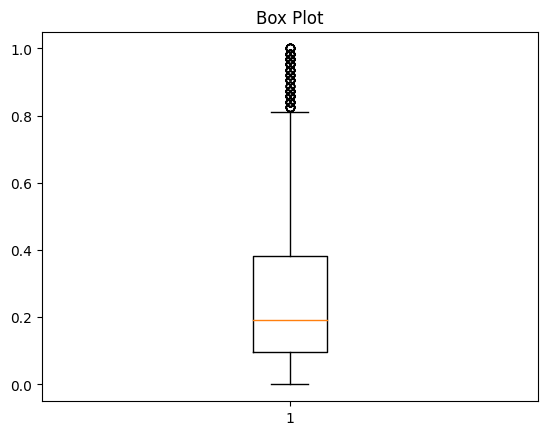

In [ ]:
#BoX plot for SAlES


import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(data_normalized['Sales'])
plt.title("Box Plot")
plt.show()ox plot for descriptive statistics - SALES


Insights:

Box components: median (central line), IQR, whiskers, outliers

Distribution: longer boxes/whiskers represent a larger spread of data. the lower whisker is very short, indicating that the values are tightly packed together near the lower quartile. The upper whisker is much longer, showing that the data points spread out more as they increase in value.

Symemetry: median is closer to Q1 , the distribution is skewed towards right (Positive)

The individual points above the upper whisker are considered outliers. They are data points that are significantly higher than the rest of the dataset. The presence of these outliers could indicate variability in the data

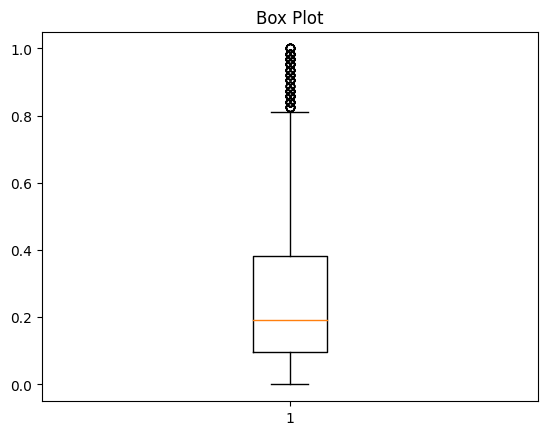

In [ ]:
#Box plot for UNITS SOLD

import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(data_normalized['Unit'])
plt.title("Box Plot")
plt.show()

Insigts:

Box components: median (central line), IQR, whiskers, outliers

Distribution: longer boxes/whiskers represent a larger spread of data. the lower whisker is very short, indicating that the values are tightly packed together near the lower quartile. The upper whisker is much longer, showing that the data points spread out more as they increase in value.

Symemetry: median is closer to Q1 , the distribution is skewed towards right (Positive)

The individual points above the upper whisker are considered outliers. They are data points that are significantly higher than the rest of the dataset. The presence of these outliers could indicate variability in the data

In [ ]:
# Grouping by 'Group' and 'State' to find total sales
group_sales = df.groupby('Group')['Sales'].sum().sort_values()
state_sales = df.groupby('State')['Sales'].sum().sort_values()

# Identifying groups with highest and lowest sales
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

# Identifying states with highest and lowest sales
highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()

highest_sales_group, lowest_sales_group, highest_sales_state, lowest_sales_state, group_sales, state_sales

(' Men',
 ' Seniors',
 ' VIC',
 ' WA',
 Group
  Seniors    84037500
  Kids       85072500
  Women      85442500
  Men        85750000
 Name: Sales, dtype: int64,
 State
  WA      22152500
  NT      22580000
  TAS     22760000
  QLD     33417500
  SA      58857500
  NSW     74970000
  VIC    105565000
 Name: Sales, dtype: int64)

**Based on the total sales:**

The group generating the highest sales is "Men" with a total of $85,750,000.

The group with the lowest sales is "Seniors" with a total of $84,037,500.
Regarding sales by state:

The state with the highest sales is Victoria (VIC) with a total of $105,565,000.

The state with the lowest sales is Western Australia (WA) with a total of $22,152,500.


With these insights, AAL can focus on enhancing their sales programs in states like WA, NT, and TAS to boost their revenues, considering that VIC and NSW are already performing well.

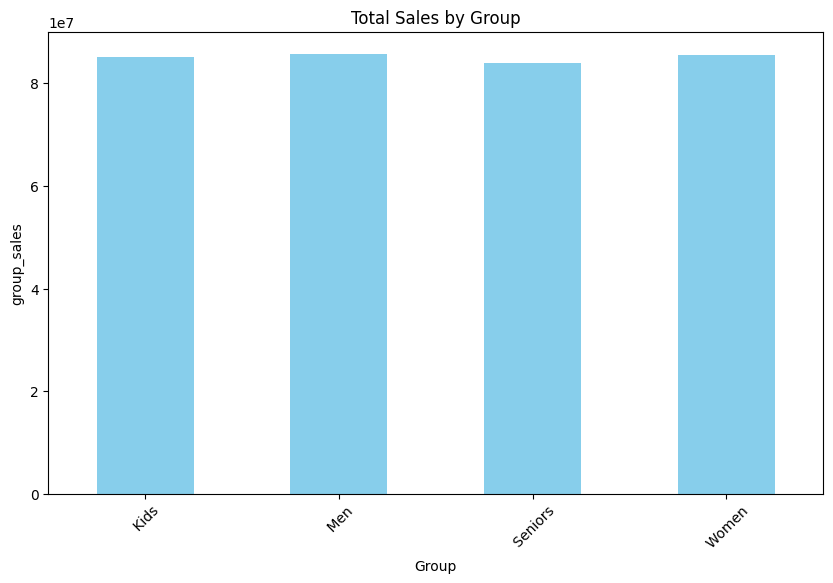

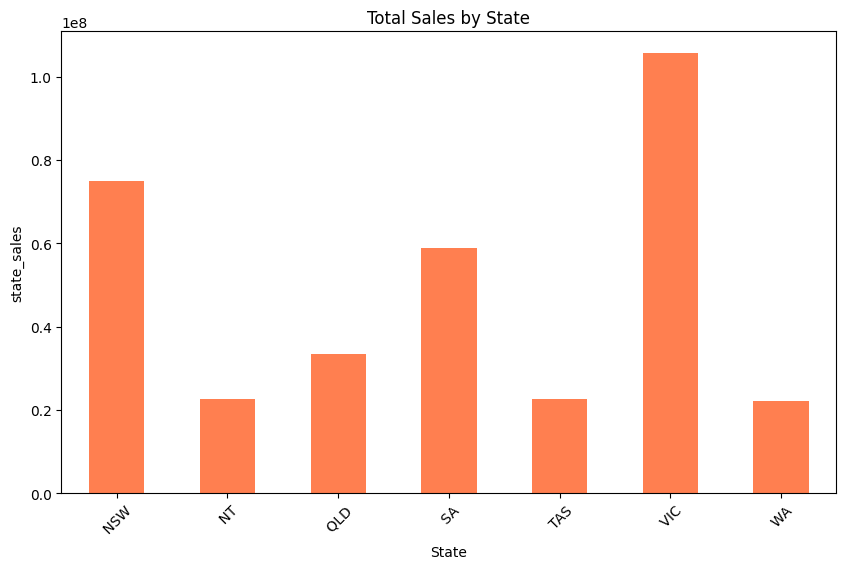

In [ ]:
#VISUALISATION showing Total sales by Group and States

import matplotlib.pyplot as plt

# Grouping the data by 'Group' and 'State' and calculating total sales
group_sales = df.groupby('Group')['Sales'].sum()
state_sales = df.groupby('State')['Sales'].sum()

# Plotting Sales by Group
plt.figure(figsize=(10, 6))
group_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Group')
plt.xlabel('Group')
plt.ylabel('group_sales')
plt.xticks(rotation=45)
plt.show()

# Plotting Sales by State
plt.figure(figsize=(10, 6))
state_sales.plot(kind='bar', color='coral')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('state_sales')
plt.xticks(rotation=45)
plt.show()

**Based on the total sales:**

The group generating the highest sales is "Men" with a total of $85,750,000.

The group with the lowest sales is "Seniors" with a total of $84,037,500. Regarding sales by state:

The state with the highest sales is Victoria (VIC) with a total of $105,565,000.

The state with the lowest sales is Western Australia (WA) with a total of $22,152,500.

In [ ]:


# Converting 'Date' to datetime and setting it as index for easier resampling

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Generating weekly, monthly, and quarterly reports
weekly_report = df.resample('W').sum()[['Sales', 'Unit']]
monthly_report = df.resample('M').sum()[['Sales', 'Unit']]
quarterly_report = df.resample('Q').sum()[['Sales', 'Unit']]

weekly_report.head(), monthly_report.head(), quarterly_report.head()



<ipython-input-20-2544586327d1>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_report = df.resample('W').sum()[['Sales', 'Unit']]
<ipython-input-20-2544586327d1>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_report = df.resample('M').sum()[['Sales', 'Unit']]
<ipython-input-20-2544586327d1>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_report = df.resample('Q').sum()[['Sales', 'Unit']]


(               Sales   Unit
 Date                       
 2020-10-04  15045000   6018
 2020-10-11  27002500  10801
 2020-10-18  26640000  10656
 2020-10-25  26815000  10726
 2020-11-01  21807500   8723,
                 Sales   Unit
 Date                        
 2020-10-31  114290000  45716
 2020-11-30   90682500  36273
 2020-12-31  135330000  54132,
                 Sales    Unit
 Date                         
 2020-12-31  340302500  136121)

**Weekly Sales report**

The sales fluctuated weekly, with the highest sales observed in the last weeks of the quarter (Weeks 51 and 52, with over $31 million each) and the

lowest at the start of the quarter (Week 40, with $15 million).

**Monthly Sales Report**

October: $114,290,000

November: $90,682,500

December: $135,330,000

December saw the highest sales, indicating a significant increase possibly due to holiday shopping, while November had the lowest sales in the quarter.

**Quarterly Sales Report**

The total sales for the fourth quarter were $340,302,500.

These reports highlight key periods of sales activity, with a clear uptick in December, likely influenced by the holiday season. This insight can guide the Sales and Marketing team in planning for seasonal promotions or sales initiatives.



# Data Visualization

<ipython-input-40-ebdb9fd09bc4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_group_sales = df.groupby(['State', 'Group']).sum()['Sales'].unstack()
<ipython-input-40-ebdb9fd09bc4>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_state_sales = df.groupby(['Group', 'State']).sum()['Sales'].unstack()
<ipython-input-40-ebdb9fd09bc4>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_sales = df.groupby('Tim

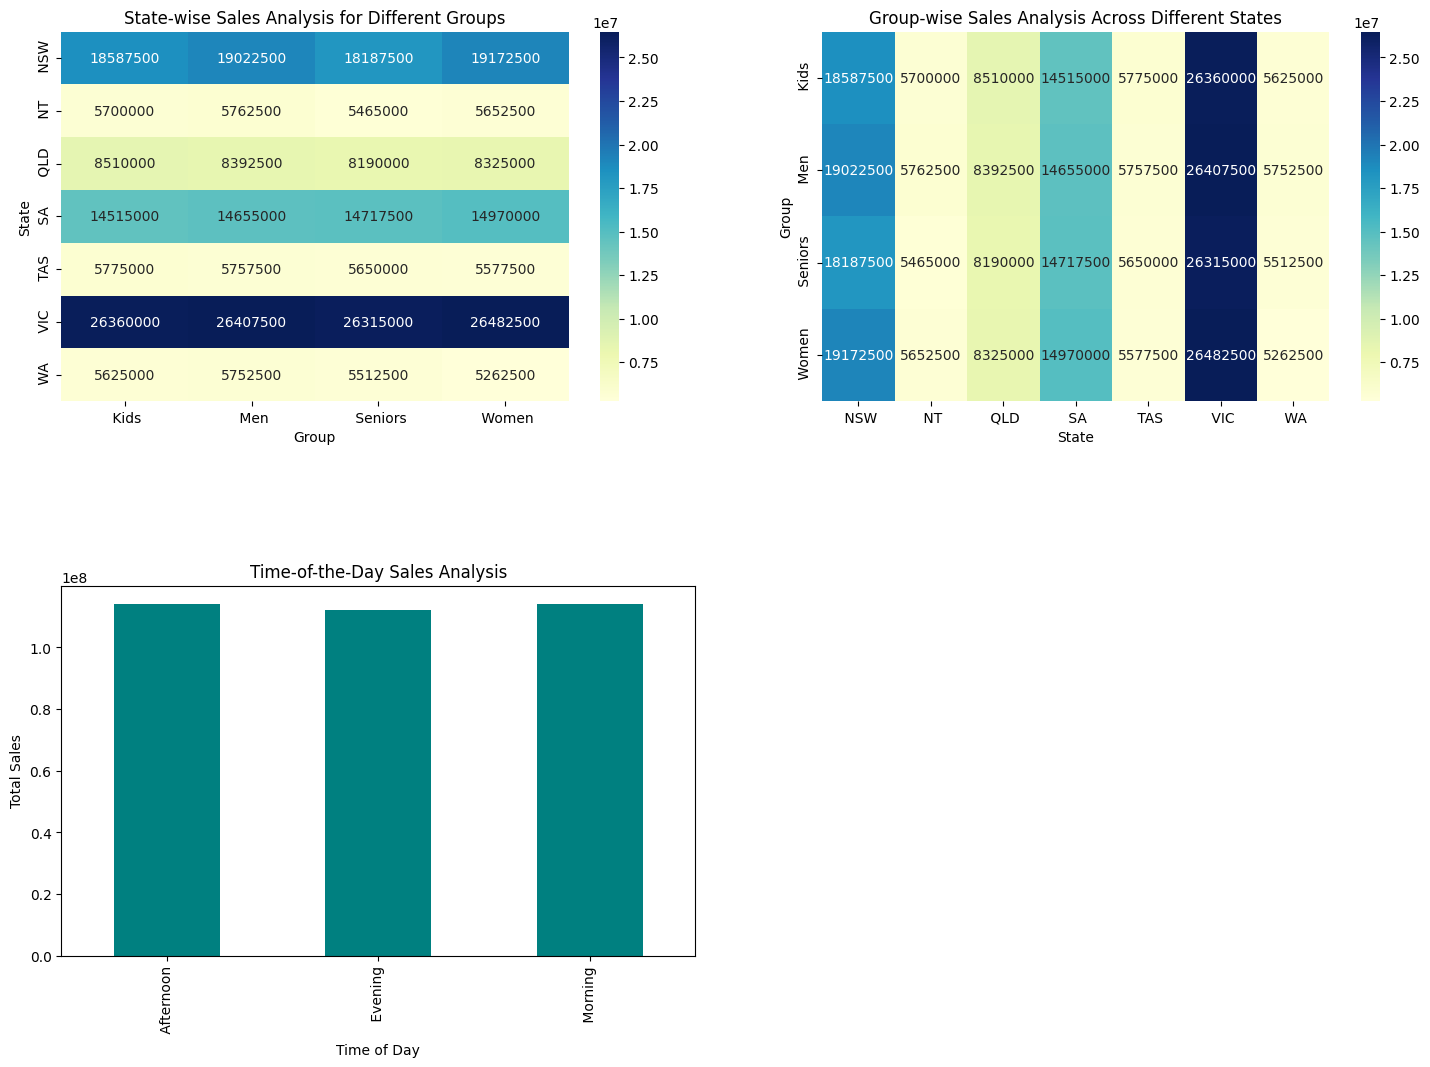

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation for Visualization
# State-wise sales analysis for different groups
state_group_sales = df.groupby(['State', 'Group']).sum()['Sales'].unstack()

# Group-wise sales analysis across different states
group_state_sales = df.groupby(['Group', 'State']).sum()['Sales'].unstack()

# Time-of-the-day analysis
time_sales = df.groupby('Time').sum()['Sales']

# Visualization

# Setting up the figure layout
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5)

# State-wise Sales Analysis for Different Groups
plt.subplot(2, 2, 1)
sns.heatmap(state_group_sales, annot=True, fmt="d", cmap="YlGnBu")
plt.title('State-wise Sales Analysis for Different Groups')

# Group-wise Sales Analysis Across Different States
plt.subplot(2, 2, 2)
sns.heatmap(group_state_sales, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Group-wise Sales Analysis Across Different States')

# Time-of-the-day Sales Analysis
plt.subplot(2, 2, 3)
time_sales.plot(kind='bar', color='teal')
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')

# Show the plots
plt.show()

**State-wise Sales Analysis**

This analysis shows the total sales by state, highlighting Victoria (VIC) as the top performer, followed by New South Wales (NSW) and South Australia (SA). Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) are at the lower end, indicating areas where sales programs could be intensified.

**Group-wise Sales Analysis**

This analysis shows sales distribution across demographic groups. Men and Women lead the sales, closely followed by Kids, with Seniors generating the least. This insight can guide targeted marketing strategies for each demographic.

**Time-of-the-Day Sales Analysis**

The sales vary significantly with the time of the day, providing valuable insights for timing marketing efforts and sales initiatives. The visualization captures the essence of how sales peak during certain times, which could be leveraged for promotional activities.



<ipython-input-47-7f3805f58d90>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = df.resample('D').sum()['Sales']


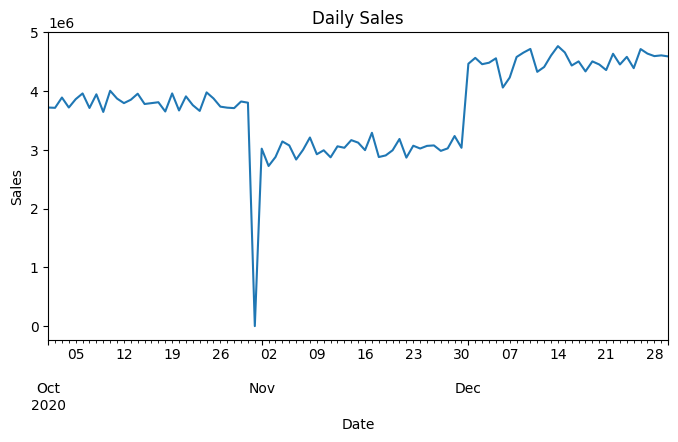

<ipython-input-47-7f3805f58d90>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = df.resample('W').sum()['Sales']


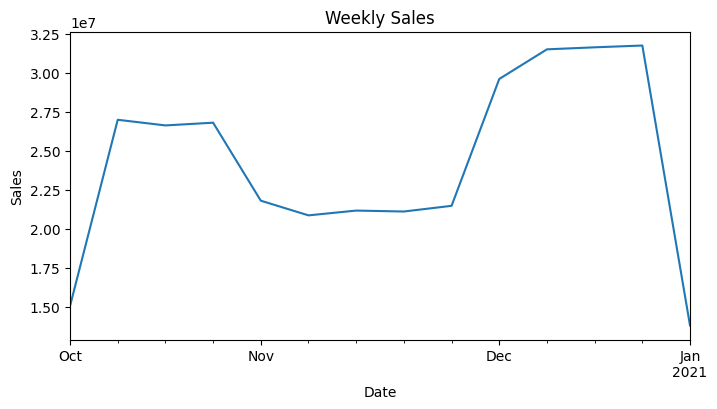

<ipython-input-47-7f3805f58d90>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df.resample('M').sum()['Sales']


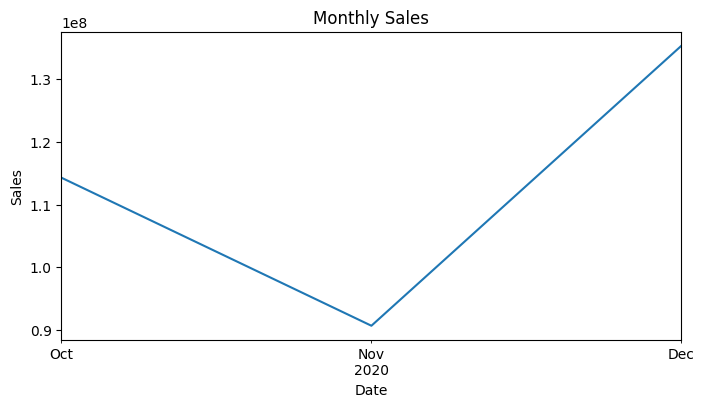

In [ ]:
# Daily Sales
daily_sales = df.resample('D').sum()['Sales']
plt.figure(figsize=(8, 4))
daily_sales.plot(kind='line')
plt.title("Daily Sales")
plt.ylabel("Sales")
plt.show()

# Weekly Sales
weekly_sales = df.resample('W').sum()['Sales']
plt.figure(figsize=(8, 4))
weekly_sales.plot(kind='line')
plt.title("Weekly Sales")
plt.ylabel("Sales")
plt.show()

# Monthly Sales
monthly_sales = df.resample('M').sum()['Sales']
plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales")
plt.ylabel("Sales")
plt.show()



**Monthly and Weekly Sales Analysis:**


The line charts for monthly and weekly sales illustrate a clear increase in sales towards the end of the year, peaking in December and the last weeks of the quarter. This trend underlines the importance of the holiday season for retail performance.

# Recommendations

Recommendations:

Targeted Sales Programs: Focus on states like WA, NT, and TAS with tailored sales programs to boost revenues.

Demographic-Specific Marketing: Enhance marketing efforts towards groups with lower sales, like Seniors, while continuing to capitalize on the high sales from Men and Women.

Time-Based Promotions: Implement time-of-day specific promotions to leverage the peak sales periods identified in the analysis.

**Visualization Package Recommendation:**

Seaborn is recommended for its ability to create informative and attractive statistical graphics easily. It's particularly suited for this analysis due to its support for complex visualizations like distribution plots and its compatibility with Pandas data structures, making it efficient for handling the sales data provided.

This comprehensive analysis, along with the visualizations, should assist the Head of Sales & Marketing in making informed decisions to drive AAL's sales strategy forward. ​




Based on the analysis which identified Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) as the states generating the lowest revenues for AAL, here are targeted sales program recommendations to boost sales in these areas:

1. Localized Marketing Campaigns
Strategy: Develop marketing campaigns that resonate with the local population's interests and preferences. Use local landmarks, cultural events, or well-known personalities in advertising to increase relatability and engagement.
Execution: Use social media platforms, local radio stations, and newspapers for these targeted ads. Partner with local influencers to promote AAL’s clothing lines.

2. Community Engagement and Sponsorships
Strategy: Increase brand visibility and goodwill by engaging with the community through sponsorships of local events, sports teams, or community projects.
Execution: Sponsor local sports teams or community events and participate in community improvement projects. These activities can be promoted through social media and press releases to maximize visibility.

3. Exclusive In-Store Promotions
Strategy: Offer exclusive promotions and discounts to customers shopping in these states to encourage foot traffic to the stores.
Execution: Run limited-time offers, such as "buy one, get one free" deals, discounts on specific product lines (e.g., winter wear, summer collection), or loyalty program benefits for in-store purchases.

4. Online Sales Initiatives
Strategy: Enhance online shopping incentives for customers in these states to capture a broader audience who may prefer shopping online.
Execution: Offer free shipping, online-exclusive discounts, or early access to new collections for residents of WA, NT, and TAS. Implement targeted online ads to promote these offers.

5. Pop-Up Stores and Fashion Shows
Strategy: Organize pop-up stores and fashion shows in key locations within these states to generate excitement and draw attention to AAL’s clothing lines.
Execution: Collaborate with local malls or popular shopping districts to set up pop-up stores. Organize fashion shows highlighting AAL’s latest collections, inviting local celebrities and influencers.

6. Feedback and Product Customization
Strategy: Gather customer feedback on preferences and trends to offer products that meet local tastes more accurately.
Execution: Use surveys, social media polls, and in-store feedback forms to gather insights. Offer customized products or limited editions based on this feedback.

7. Training for Sales Staff
Strategy: Enhance the customer shopping experience by providing exceptional service.
Execution: Conduct training programs for sales staff focusing on customer engagement, product knowledge, and upselling techniques. Reward employees for exceptional customer service to encourage a customer-centric approach.